In [1]:
import numpy as np
import pandas as pd

In [427]:
df = pd.read_csv('spam.csv', encoding='utf-8', encoding_errors='ignore')
#to remove encoding errors

In [17]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2503,ham,Fwiw the reason I'm only around when it's time...,NaN,NaN,NaN
3529,ham,Tyler (getting an 8th) has to leave not long a...,NaN,NaN,NaN
1088,spam,You are awarded a SiPix Digital Camera! call 0...,NaN,NaN,NaN
2164,ham,"Nothing really, just making sure everybody's u...",NaN,NaN,NaN
32,ham,K tell me anything about you.,NaN,NaN,NaN


In [21]:
df.shape

(5572, 5)

In [ ]:
#steps to be followed:
# 1.Data Cleaning
# 2.Exploratory Data Analysis(EDA)
# 3.Text Preprocessing
# 4.Model Building
# 5.Evaluation
# 6.Improvement
# 7.Website

### 1.Data Cleaning

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5168 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5168 non-null   int32 
 1   Message   5168 non-null   object
dtypes: int32(1), object(1)
memory usage: 100.9+ KB


In [429]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [431]:
df.sample(5)

,v1,v2
3781,ham,How r _ going to send it to me?
3690,ham,"Sir, i am waiting for your call, once free ple..."
1147,ham,Ok... Help me ask if she's working tmr a not?
2113,ham,"Yeah, don't go to bed, I'll be back before mid..."
1137,ham,LOL ... No just was busy


In [433]:
df.rename(columns={'v1':'Category','v2':'Message'},inplace=True)
df.sample(5)

,Category,Message
2905,ham,"Helloooo... Wake up..! \Sweet\"" \""morning\"" \""..."
334,spam,Valentines Day Special! Win over 1000 in our q...
1193,spam,Sex up ur mobile with a FREE sexy pic of Jorda...
3559,ham,Lol I know! Hey someone did a great inpersonat...
3852,ham,"Dont worry, 1 day very big lambu ji vl come..t..."


In [435]:
#converting ham/spam to 0/1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [437]:
df['Category']=encoder.fit_transform(df['Category'])

In [439]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [441]:
#checking missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [443]:
#checking for duplicates
df.duplicated().sum()

404

In [445]:
df = df.drop_duplicates(keep='first')

In [447]:
df.duplicated().sum()

0

In [449]:
df.shape

(5168, 2)

### 2.EDA

In [452]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [454]:
df['Category'].value_counts()

Category
0    4516
1     652
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x20440cca330>,
 [Text(-1.0147253819927426, 0.42465562417055414, 'Ham'),
  Text(1.0147254018723058, -0.4246555766678308, 'Spam')],
 [Text(-0.5534865719960413, 0.23163034045666586, '87.38'),
  Text(0.5534865828394394, -0.2316303145460895, '12.62')])

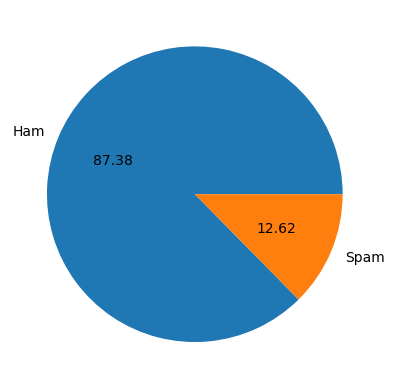

In [456]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['Ham','Spam'],autopct="%0.2f")

In [65]:
# This shows our data is imbalanced

In [458]:
#now, we'll check how many letters,words and sentences are used in msgs
import nltk #natural language tool kit

In [69]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [460]:
#Num of characters 
df['No_of_Characters'] = df['Message'].apply(len)

In [75]:
df.head()

,Category,Message,No_of_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [462]:
#Num of words
df['Message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, _, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5168, dtype: object

In [83]:
!pip install nltk

In [87]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [464]:
#converts sentence into list of words
df['Message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, _, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5168, dtype: object

In [466]:
#num of words
df['No_of_Words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [467]:
#num of sentences
df['No_of_Sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [99]:
df.head()

,Category,Message,No_of_Characters,No_of_Words,No_of_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [470]:
#Description of all messages
df[['No_of_Characters','No_of_Words','No_of_Sentences']].describe()

,No_of_Characters,No_of_Words,No_of_Sentences
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [472]:
#Ham msgs
df[df['Category']==0][['No_of_Characters','No_of_Words','No_of_Sentences']].describe()

,No_of_Characters,No_of_Words,No_of_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108946,1.819973
std,56.328803,13.494730,1.383228
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [474]:
#Spam msgs
df[df['Category']==1][['No_of_Characters','No_of_Words','No_of_Sentences']].describe()

,No_of_Characters,No_of_Words,No_of_Sentences
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.980061
std,29.937352,7.015283,1.491780
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


<Axes: xlabel='No_of_Characters', ylabel='Count'>

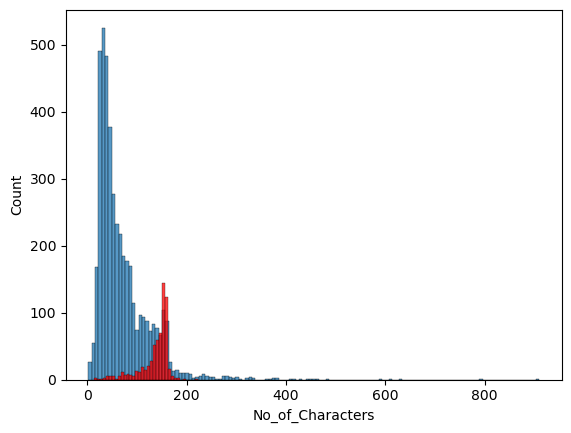

In [476]:
import seaborn as sns

sns.histplot(df[df['Category']==0]['No_of_Characters'])
sns.histplot(df[df['Category']==1]['No_of_Characters'],color='red')

In [477]:
df.head(10)

,Category,Message,No_of_Characters,No_of_Words,No_of_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,146,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,156,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


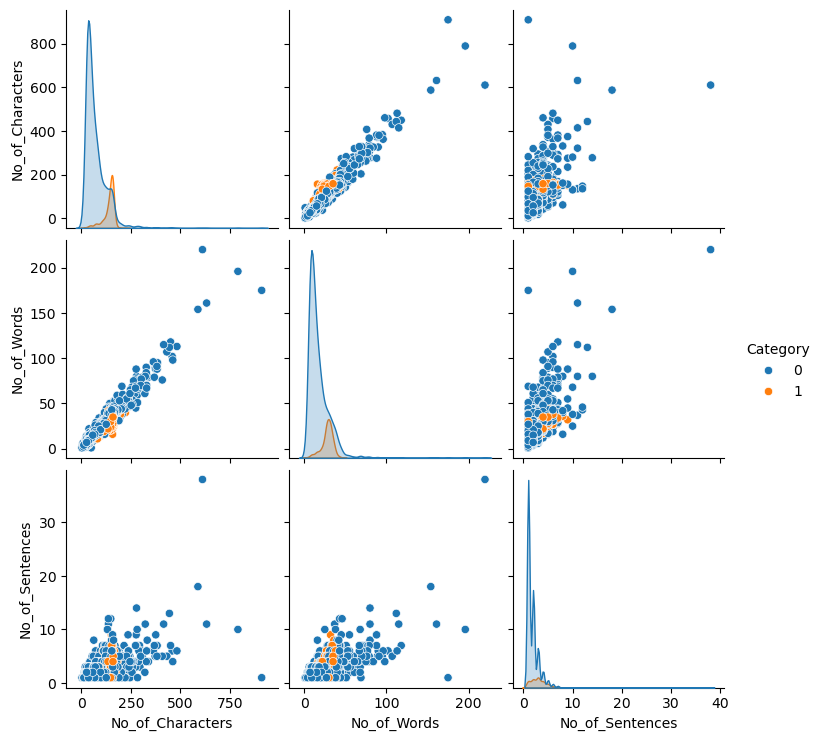

In [478]:
sns.pairplot(df,hue="Category")

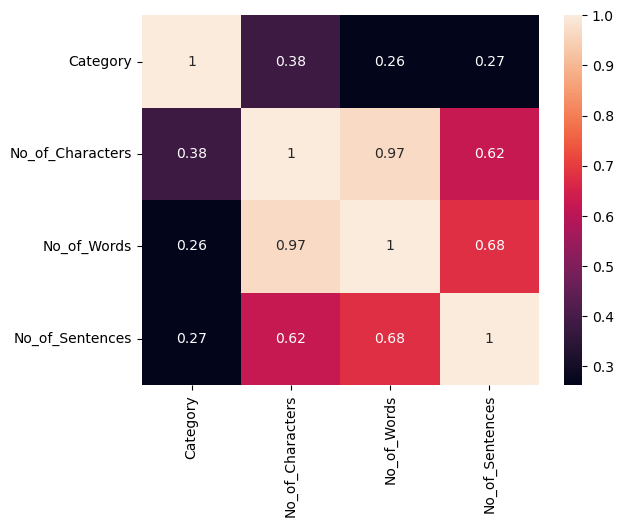

In [479]:
# Filter numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32', 'float32'])

# Compute and visualize correlation
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


### 3.Data Preprocessing

In [145]:
#stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [485]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [487]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]   #assigning list to text
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [489]:
transform_text('Hi....how are you Tanushri?')

'hi tanushri'

In [491]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('Enjoyable')

'enjoy'

In [171]:
transform_text('Hi....how are you Tanushri 15? maths is interesting, are u happyily married')

'hi tanushri 15 math interest u happyili marri'

In [493]:
df['Transformed_Message'] = df['Message'].apply(transform_text)

In [177]:
df.head()

,Category,Message,No_of_Characters,No_of_Words,No_of_Sentences,Transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [185]:
#word cloud - shows important words bigger
!pip install wordcloud

In [187]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [189]:
spam_wc = wc.generate(df[df['Category']==1]['Transformed_Message'].str.cat(sep=" "))

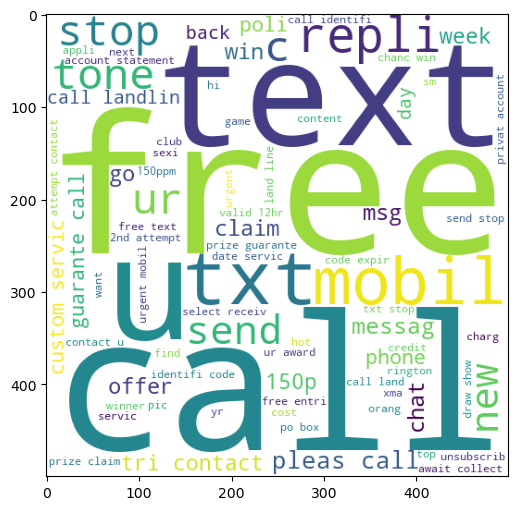

In [193]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [195]:
ham_wc = wc.generate(df[df['Category']==0]['Transformed_Message'].str.cat(sep=" "))

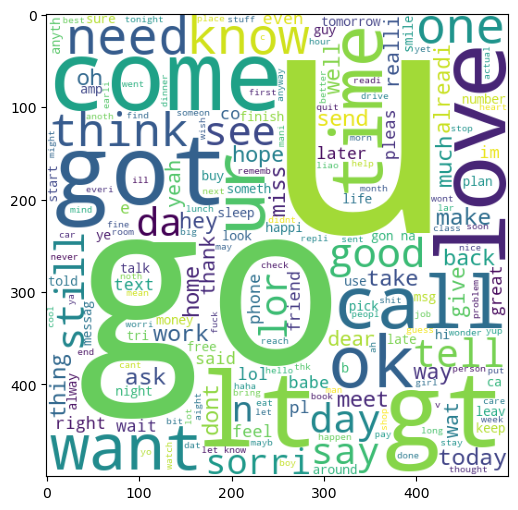

In [199]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [201]:
#to find top 50 words in ham and spam
spam_corpus=[]
for msg in df[df['Category']==1]['Transformed_Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

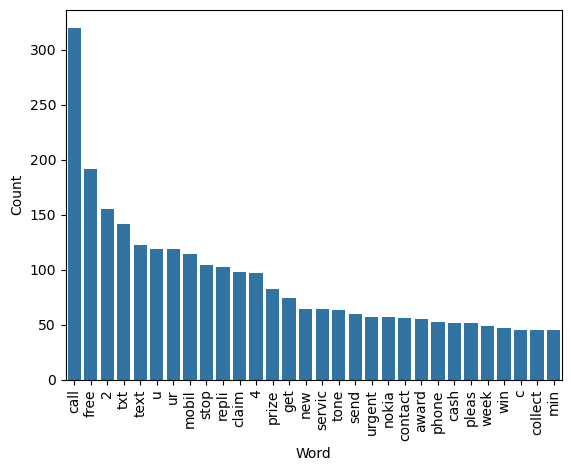

In [213]:
from collections import Counter
# Get the 30 most common words and their counts
most_common_data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])
# Create the barplot with the correct syntax
sns.barplot(x='Word', y='Count', data=most_common_data)
plt.xticks(rotation='vertical')
plt.show()

In [215]:
ham_corpus=[]
for msg in df[df['Category']==0]['Transformed_Message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

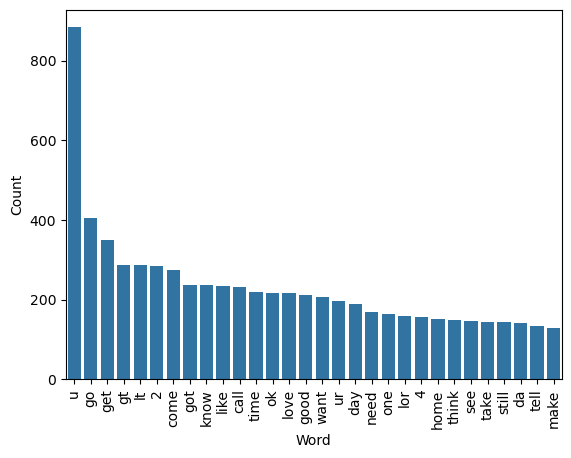

In [217]:
# Get the 30 most common words and their counts
most_common_data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])
# Create the barplot with the correct syntax
sns.barplot(x='Word', y='Count', data=most_common_data)
plt.xticks(rotation='vertical')
plt.show()

### 4.Model Building

In [246]:
#Naive Bayes Algorithm 

In [494]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)   
#any one vectorizer can be used

In [495]:
# X = cv.fit_transform(df['Transformed_Message']).toarray()
X = tfidf.fit_transform(df['Transformed_Message']).toarray()

In [496]:
X.shape

(5168, 3000)

In [497]:
y=df['Category'].values

In [498]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [499]:
from sklearn.model_selection import train_test_split

In [500]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [501]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [502]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [503]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8752417794970987
[[791 102]
 [ 27 114]]
0.5277777777777778


In [376]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   0]
 [ 31 110]]
1.0


In [504]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[892   1]
 [ 20 121]]
0.9918032786885246


In [381]:
#first performed with countvectorizer then with tfidfvectorizer
# since data is imbalanced, precision matters more than accuracy
# mnb for tfdif has precision of 1.0, so it is chosen

#Now, checking other Algorithms

## 5.Evaluation

In [384]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier #RandomForest
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 

In [386]:
!pip install xgboost

In [390]:
#making objects
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [315]:
#dictionary with key=algo, value=object
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [505]:
#function to find accuracy and precision for every algo
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [394]:
#Calling above function for every algo
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy = ",current_accuracy)
    print("precision = ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy =  0.97678916827853
precision =  0.9834710743801653
For  KN
Accuracy =  0.9013539651837524
precision =  1.0
For  NB
Accuracy =  0.9700193423597679
precision =  1.0
For  DT
Accuracy =  0.9294003868471954
precision =  0.8695652173913043
For  LR
Accuracy =  0.9555125725338491
precision =  0.9611650485436893
For  RF
Accuracy =  0.9671179883945842
precision =  0.9908256880733946


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy =  0.960348162475822
precision =  0.9464285714285714
For  BgC
Accuracy =  0.960348162475822
precision =  0.8787878787878788
For  ETC
Accuracy =  0.971953578336557
precision =  0.9745762711864406
For  GBDT
Accuracy =  0.9458413926499033
precision =  0.9381443298969072
For  xgb
Accuracy =  0.9680851063829787
precision =  0.9655172413793104


In [395]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.901354,1.000000
2,NB,0.970019,1.000000
5,RF,0.967118,0.990826
0,SVC,0.976789,0.983471
8,ETC,0.971954,0.974576
10,xgb,0.968085,0.965517
4,LR,0.955513,0.961165
6,AdaBoost,0.960348,0.946429
9,GBDT,0.945841,0.938144
7,BgC,0.960348,0.878788


In [398]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

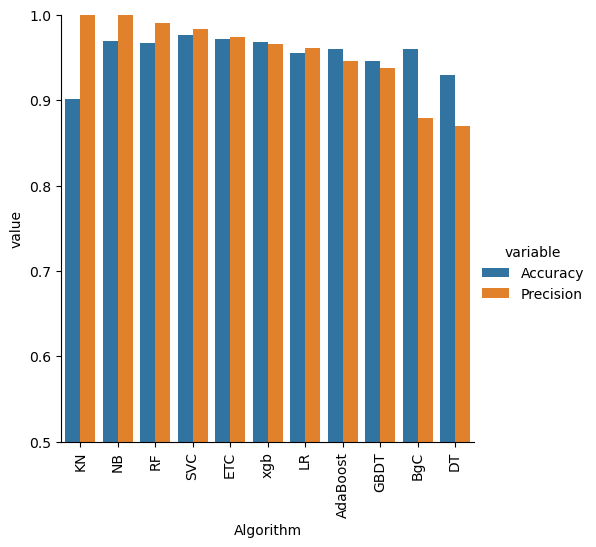

In [400]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1
           ,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## 6.Improvement

In [402]:
#Changing max_features of Tfidf to 3000 for better accuracy
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.901354,1.000000,0.901354,1.000000,0.901354,1.000000,0.901354,1.000000
1,NB,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000
2,RF,0.967118,0.990826,0.967118,0.990826,0.967118,0.990826,0.967118,0.990826
3,SVC,0.976789,0.983471,0.976789,0.983471,0.976789,0.983471,0.976789,0.983471
4,ETC,0.971954,0.974576,0.971954,0.974576,0.971954,0.974576,0.971954,0.974576
5,xgb,0.968085,0.965517,0.968085,0.965517,0.968085,0.965517,0.968085,0.965517
6,LR,0.955513,0.961165,0.955513,0.961165,0.955513,0.961165,0.955513,0.961165
7,AdaBoost,0.960348,0.946429,0.960348,0.946429,0.960348,0.946429,0.960348,0.946429
8,GBDT,0.945841,0.938144,0.945841,0.938144,0.945841,0.938144,0.945841,0.938144
9,BgC,0.960348,0.878788,0.960348,0.878788,0.960348,0.878788,0.960348,0.878788


In [412]:
#Trying Voting Classifier - Combination of multiple algorithms
#here, every algo has similar weightage
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [406]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [408]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [410]:
y_pred=voting.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))

Accuracy:  0.9816247582205029
Precision:  1.0


In [414]:
#Trying Stacking- Combination of algos with different weightage
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [416]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [418]:
clf.fit(X_train,y_train)
y_pred=voting.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))

Accuracy:  0.9816247582205029
Precision:  1.0


In [420]:
#Conclusion - we will go with MultinomialNB 

## 7.Website

In [423]:
#import the required files for making the website

In [519]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [525]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   0]
 [ 31 110]]
1.0


In [527]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))